In [1]:
%load_ext autoreload
%autoreload 2

import os
import glob
import numpy as np

from utilities.script.image_utils import image_loader, show_image

In [2]:
parent_dataset_path = "dataset/"

# Obtain parent path
parent_images_path = glob.glob(parent_dataset_path + "/*")

# Obtain every image and get the label
images = []
labels = []
for idx_parent, parent_path in enumerate(parent_images_path):
    # Obtain every data inside child directory
    images_paths = glob.glob(parent_path + "/*")

    # Get each of the image and extract the label
    for idx_child, child_path in enumerate(images_paths):
        # Normalizing slashes
        normalized_child_path = images_paths[idx_child].replace("\\", "/").replace("//", "/")
        #print(idx_child, type(child_path))

        # Load the images and perform normalization
        image = image_loader(normalized_child_path, resize=(96, 96))
        images.append(image)
        
        label = normalized_child_path.split("/")[1]
        labels.append(label)

In [3]:
# Convert to NumPY
images = np.array(images)
labels = np.array(labels)

print("Images shape {} and Labels shape {}".format(images.shape, labels.shape))

Images shape (2188, 96, 96, 3) and Labels shape (2188,)


Corresponding label : paper


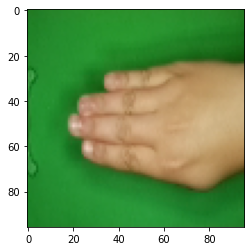

In [4]:
# Check image and label syncronization

index_check = 500
show_image(images[index_check], labels[index_check])

In [5]:
label_format = np.array(sorted(['rock', 'paper', 'scissors']))
np.savez("utilities/label_format.npz", label=label_format)

Corresponding label : 0


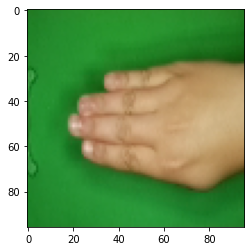

In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels from string into numerical
le = LabelEncoder()
le.fit(label_format)
labels = le.transform(labels)

show_image(images[index_check], labels[index_check])

In [7]:
print(le.classes_)

['paper' 'rock' 'scissors']


In [9]:
from sklearn.model_selection import KFold

parent_save_path = "utilities/data"

splits =  [4, 5, 6]
for split in splits:
    # Perfrom KFold to split train and test
    kf = KFold(n_splits=split, random_state=32, shuffle=True)
    for train_index, test_index in kf.split(images):
        x_train, y_train = images[train_index], labels[train_index]
        x_test, y_test = images[test_index], labels[test_index]

    # Arrange filename and paths
    fname_train, fname_test = "train_" + str(split) + ".npz", "test_" + str(split) + ".npz"
    train_saving_path, test_saving_path = os.path.join(parent_save_path, str(split), fname_train), os.path.join(parent_save_path, str(split),fname_test)

    # Save the data
    np.savez(train_saving_path, x=x_train, y=y_train)
    np.savez(test_saving_path, x=x_test, y=y_test)
    